<a href="https://colab.research.google.com/github/JuannMontoya/Teoria_Aprendizaje_Maquinas_2025-2/blob/main/Tareas/3_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_regression
N = 1000 # samples
P = 20  #features
X, y = make_regression(n_samples=N, n_features=P,
                       noise=1, random_state=42)
print(X.shape,y.shape)


(1000, 20) (1000,)


<function matplotlib.pyplot.show(close=None, block=None)>

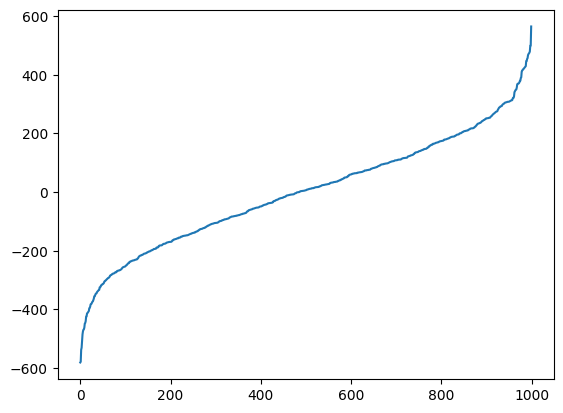

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.sort(y))
plt.show

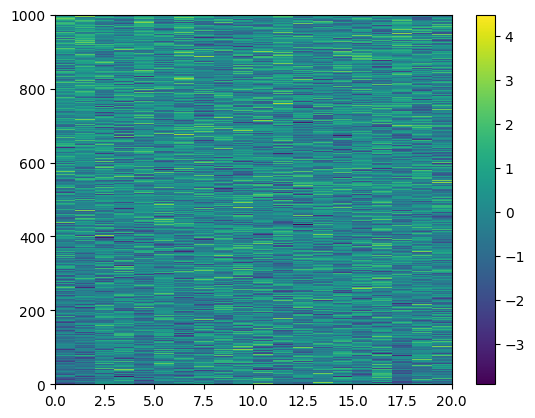

In [ ]:
ind_ = np.argsort(y)
plt.pcolormesh(X[ind_])
plt.colorbar()
plt.show()

In [ ]:
def mincua_reg(X,y,lam_=1e-3): #fit, opt
  alpha = np.linalg.inv(X.T.dot(X)+lam_*np.eye(X.shape[1])).dot(X.T).dot(y)
  return alpha

[ 7.99999269e+01  9.86015897e+01  5.57286288e+00  2.41760761e-02
  8.64704289e+01 -3.94575875e-02  6.94411862e+01 -3.56275838e-03
  2.38619256e-02 -3.12145636e-02  1.86214575e+01  3.96564254e+01
  4.91812853e-03  3.10939044e+00 -4.42071056e-02  2.63860334e+01
 -2.41981026e-02  8.68971640e+01  3.51245931e-02  1.62243894e-02]


<StemContainer object of 3 artists>

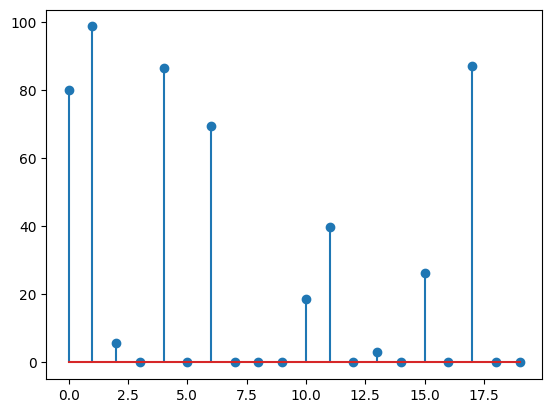

In [ ]:
alpha =mincua_reg(X,y)
print(alpha)
plt.stem(np.arange(len(alpha)),np.abs(alpha))

In [ ]:
ypred =X.dot(alpha)

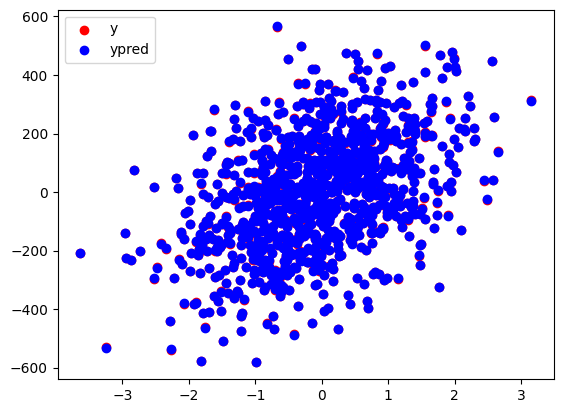

In [ ]:
plt.scatter(X[ind_,0],y[ind_],c='r',marker='o',label='y')
plt.scatter(X[ind_,0],ypred [ind_],c='b',label='ypred')
plt.legend()
plt.show()

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


(20640, 8) (20640,)


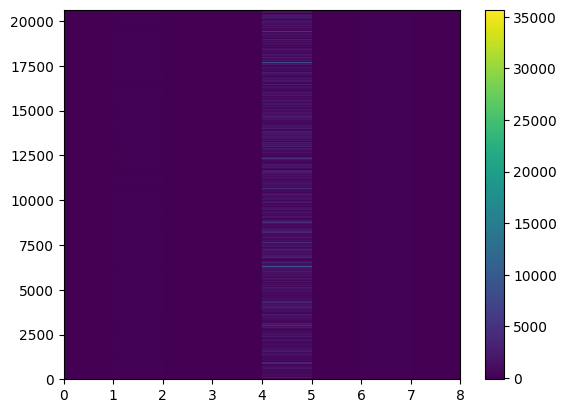

In [ ]:
X = housing.data
y = housing.target
print(X.shape,y.shape)
plt.pcolormesh(X)
plt.colorbar()
plt.show()

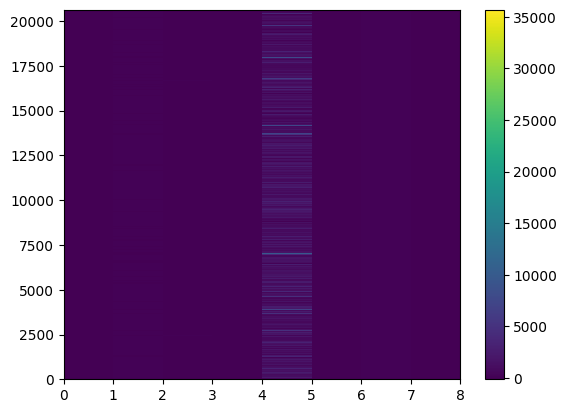

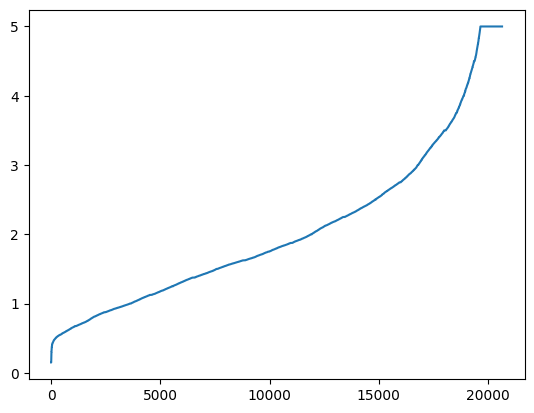

In [ ]:
ind_ = np.argsort(y)
plt.pcolormesh(X[ind_])
plt.colorbar()
plt.show()
plt.plot(y[ind_])
plt.show()

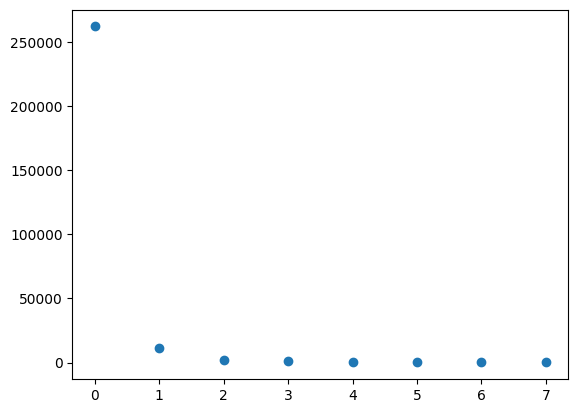

In [ ]:
U,S,Vh =np.linalg.svd(X)
plt.scatter(np.arange(len(S)),S)
plt.show()

iter 1000 | loss=21.165644
iter 2000 | loss=19.804626
iter 3000 | loss=19.804449
iter 4000 | loss=19.804449
iter 5000 | loss=19.804449
Paro en iter 5289, loss=19.804449
alpha_gd: [ 7.99234120e+01  9.84967126e+01  5.56727564e+00  2.89041668e-02
  8.63811498e+01 -4.14774214e-02  6.93685201e+01 -3.15422042e-03
  1.71832693e-02 -2.97753378e-02  1.85986936e+01  3.96180844e+01
  5.85738567e-03  3.09818535e+00 -4.63238755e-02  2.63652095e+01
 -3.39829816e-02  8.68070799e+01  3.66815470e-02  1.64772629e-02]


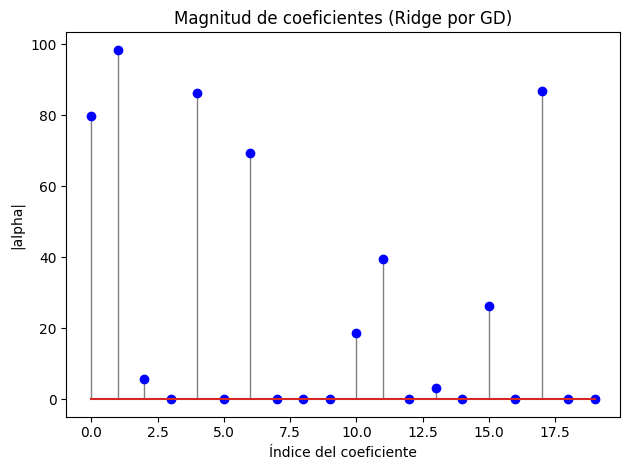

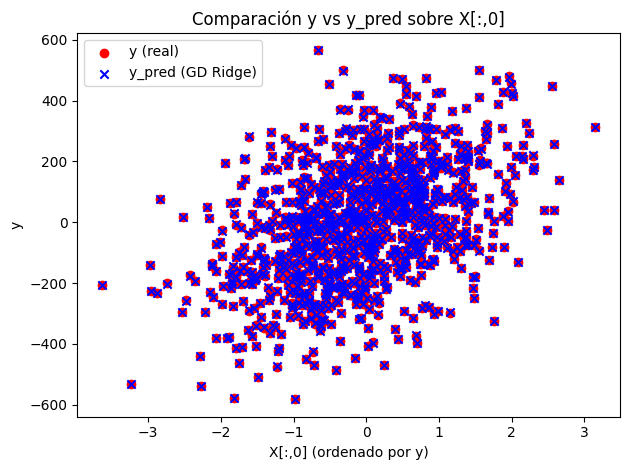

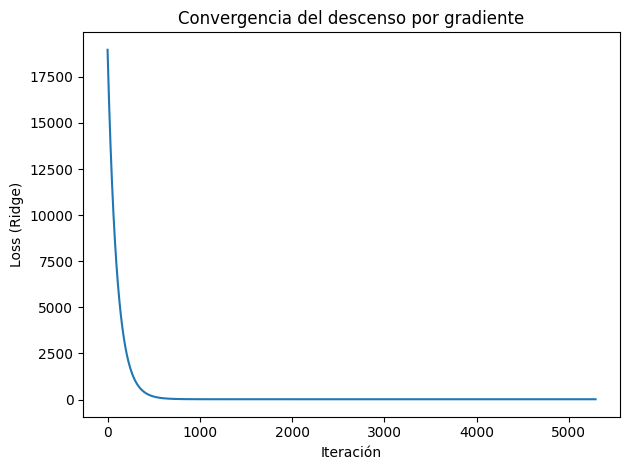

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, fetch_california_housing

# -----------------------------
# Datos de prueba (como en tu cuaderno)
# -----------------------------
N, P = 1000, 20
X_syn, y_syn = make_regression(n_samples=N, n_features=P, noise=1, random_state=42)

# --- O usa Housing (descomenta estas 4 líneas si quieres correr en housing) ---
# housing = fetch_california_housing()
# X_syn = housing.data
# y_syn = housing.target
# print(X_syn.shape, y_syn.shape)

# -----------------------------
# Descenso por gradiente para Ridge (sin intercepto, coherente con tu mincua_reg)
# J(a) = (1/(2N))||y - X a||^2 + (lam/2)||a||^2
# grad = -(1/N) X^T (y - X a) + lam a
# -----------------------------
def ridge_gd(X, y, lam=1e-3, lr=1e-2, n_iters=5000, tol=1e-8, verbose=False):
    N, P = X.shape
    a = np.zeros(P)  # inicialización
    loss_hist = []

    for it in range(n_iters):
        y_pred = X @ a
        resid  = y_pred - y
        # pérdida
        loss = 0.5/N * np.dot(resid, resid) + 0.5*lam * np.dot(a, a)
        loss_hist.append(loss)

        # gradiente
        grad = (1.0/N) * (X.T @ resid) + lam * a

        # actualización
        a_new = a - lr * grad

        # criterio de paro simple por cambio de parámetros
        if np.linalg.norm(a_new - a) < tol:
            a = a_new
            if verbose:
                print(f"Paro en iter {it}, loss={loss:.6f}")
            break
        a = a_new

        if verbose and (it+1) % 1000 == 0:
            print(f"iter {it+1:4d} | loss={loss:.6f}")

    return a, np.array(loss_hist)

# -----------------------------
# Entrenamiento (ajusta lr/lam si hace falta)
# -----------------------------
lam      = 1e-3     # misma idea que en tu método analítico
lr       = 5e-3     # paso de aprendizaje
n_iters  = 8000
alpha_gd, loss_hist = ridge_gd(X_syn, y_syn, lam=lam, lr=lr, n_iters=n_iters, tol=1e-10, verbose=True)

print("alpha_gd:", alpha_gd)

# -----------------------------
# Gráfica de coeficientes (alpha)
# -----------------------------
plt.figure()
markerline, stemlines, baseline = plt.stem(np.arange(len(alpha_gd)), np.abs(alpha_gd))
plt.setp(markerline, markersize=6, marker='o', color='b')
plt.setp(stemlines, color='gray', linewidth=1.0)
plt.xlabel('Índice del coeficiente')
plt.ylabel('|alpha|')
plt.title('Magnitud de coeficientes (Ridge por GD)')
plt.tight_layout()
plt.show()

# -----------------------------
# Predicción y scatter comparativo vs X[:,0]
# -----------------------------
y_pred = X_syn @ alpha_gd
ind_ = np.argsort(y_syn)

plt.figure()
plt.scatter(X_syn[ind_, 0], y_syn[ind_], c='r', marker='o', label='y (real)')
plt.scatter(X_syn[ind_, 0], y_pred[ind_], c='b', marker='x', label='y_pred (GD Ridge)')
plt.xlabel('X[:,0] (ordenado por y)')
plt.ylabel('y')
plt.legend()
plt.title('Comparación y vs y_pred sobre X[:,0]')
plt.tight_layout()
plt.show()

# -----------------------------
# (Opcional) Curva de pérdida para ver convergencia
# -----------------------------
plt.figure()
plt.plot(loss_hist)
plt.xlabel('Iteración')
plt.ylabel('Loss (Ridge)')
plt.title('Convergencia del descenso por gradiente')
plt.tight_layout()
plt.show()
